# Problem 1

In [1]:
from six.moves import cPickle

x_reg = cPickle.load(open('x_reg.pkl', 'rb'))
y_reg = cPickle.load(open('y_reg.pkl', 'rb'))

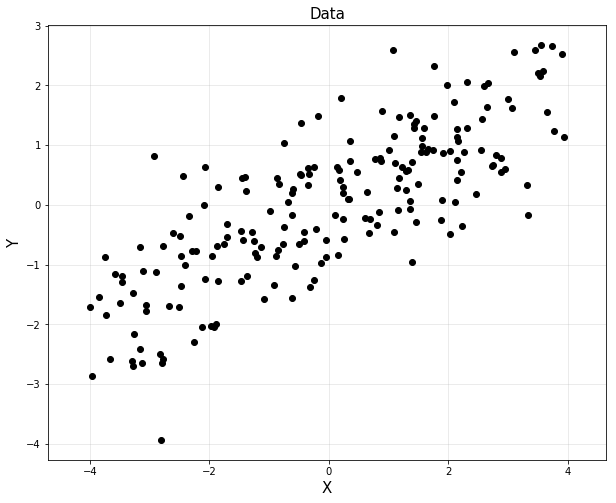

In [11]:
plt.figure(figsize=(10, 8))
plt.plot(x_reg, y_reg, 'ko')
plt.title('Data', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.axis('equal')
plt.grid(alpha=0.3)

### 1) Least squares regression

In [12]:
x = x_reg.reshape(-1, 1)
y = y_reg.reshape(-1, 1)

In [13]:
m = y.shape[0]
A = np.hstack([x**0, x])
A = np.asmatrix(A)

theta = (A.T * A).I * A.T * y

print('theta:\n', theta)

theta:
 [[4.52762827e-16]
 [4.82484530e-01]]


### 2) PCA Regression

In [16]:
X = np.hstack((x, y))
X = np.asmatrix(X)
X.shape

(200, 2)

In [18]:
S = 1 / (m - 1) * X.T * X

D, U = np.linalg.eig(S)

idx = np.argsort(-D)
D = D[idx]
U = U[:, idx]

print(D, '\n')
print(U)

[5.53516586 0.48821431] 

[[ 0.87883228 -0.47713083]
 [ 0.47713083  0.87883228]]


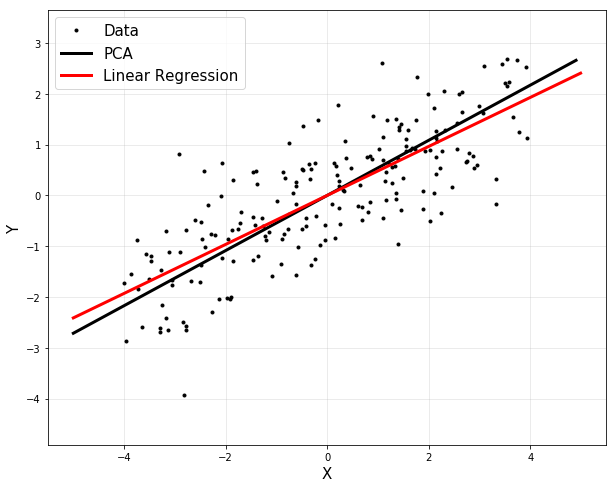

In [19]:
h = U[1, 0] / U[0, 0]
xp = np.arange(-5, 5, 0.1)
yp = h * xp

fig = plt.figure(figsize=(10, 8))
plt.plot(X[:, 0], X[:, 1], 'k.', label='Data')
plt.plot(xp, yp, 'k', linewidth=3, label='PCA')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)

# to plot a straight line (fitted line)
xp = np.arange(-5, 5, 0.01).reshape(-1, 1)
yp = theta[0, 0] + theta[1, 0] * xp

plt.plot(xp, yp, 'r', linewidth=3, label="Linear Regression")
plt.legend(fontsize=15)
plt.xlim([-5, 5])
plt.axis('equal')
plt.grid(alpha=0.3)
plt.show()

### 3) Comment on why the results are different as shown in the following Figure?

PCA tries to find a best fit line through the data points by minimizing the orthogonal distance to the model line whereas least squares regression minimizes the error between the dependent and the model(from the perspective of the axis we're regressing with respect to)

# Problem 2

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

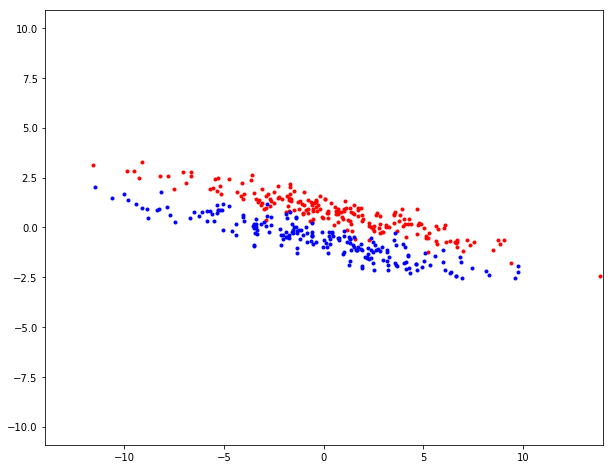

In [8]:
n0 = 200
n1 = 200

sigma = [[19, -4],
         [-4, 1]]

x0 = np.random.multivariate_normal([0.7,0.7], sigma, n0)        # data in class 0
x1 = np.random.multivariate_normal([-0.5,-0.5], sigma, n1)      # data in class 1

x0 = np.asmatrix(x0)
x1 = np.asmatrix(x1)

plt.figure(figsize = (10, 8))
plt.plot(x0[:,0],x0[:,1],'r.')
plt.plot(x1[:,0],x1[:,1],'b.')
plt.axis('equal')
plt.ylim([-8, 8])
plt.xlim([-14, 14])
plt.show()

### 1) Fisher discriminant analysis

In [20]:
mu0 = np.mean(x0.T, axis=1)
mu1 = np.mean(x1.T, axis=1)
S0 = 1 / (n0 - 1) * (x0.T - mu0) * (x0.T - mu0).T
S1 = 1 / (n1 - 1) * (x1.T - mu1) * (x1.T - mu1).T

In [21]:
w = (n0 * S0 + n1 * S1).I * (mu0 - mu1)
print(w)

[[0.00462491]
 [0.02120461]]


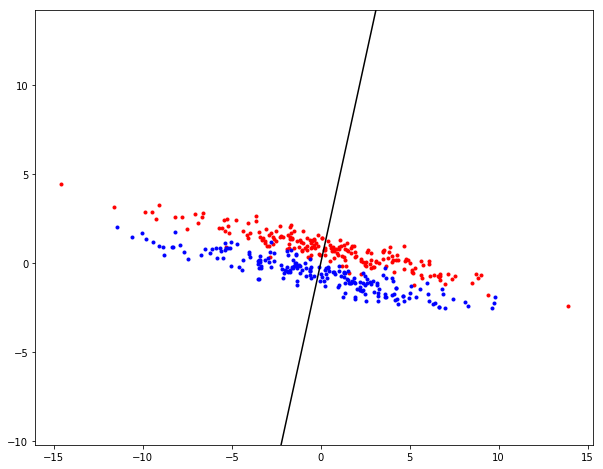

In [22]:
plt.figure(figsize=(10, 8))
plt.plot(x0[:, 0], x0[:, 1], 'r.')
plt.plot(x1[:, 0], x1[:, 1], 'b.')

xp = np.arange(-4, 6, 0.1)
yp = w[1, 0] / w[0, 0] * xp
plt.plot(xp, yp, 'k')
plt.axis('equal')
plt.ylim([-2, 6])
plt.show()

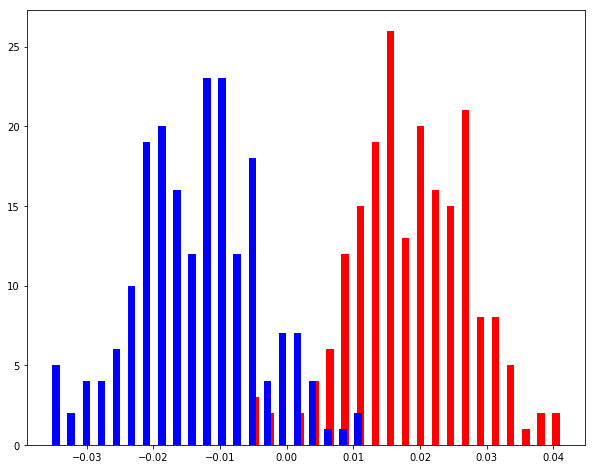

In [23]:
y1 = x0 * w
y2 = x1 * w

plt.figure(figsize=(10, 8))
plt.hist(y1, 21, color='r', rwidth=0.5)
plt.hist(y2, 21, color='b', rwidth=0.5)
plt.show()

### 2) PCA

In [25]:
X = np.vstack([x0, x1])

In [26]:
S = 1 / (m - 1) * X.T * X

D, U = np.linalg.eig(S)

idx = np.argsort(-D)
D = D[idx]
U = U[:, idx]

print(D, '\n')
print(U)

[38.23683402  1.47246807] 

[[ 0.97871643  0.20521734]
 [-0.20521734  0.97871643]]


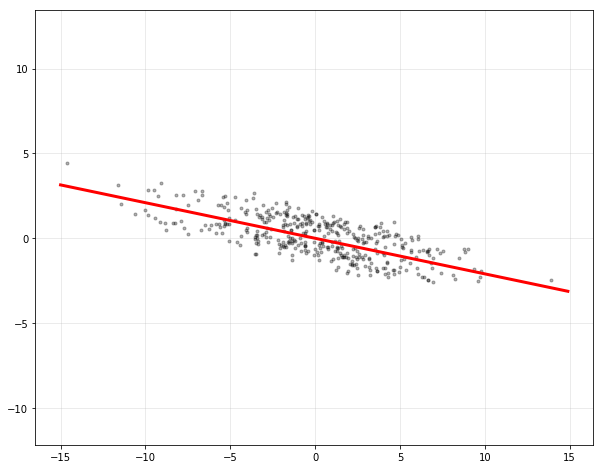

In [27]:
h = U[1, 0] / U[0, 0]
xp = np.arange(-15, 15, 0.1)
yp = h * xp

fig = plt.figure(figsize=(10, 8))
plt.plot(X[:, 0], X[:, 1], 'k.', alpha=0.3)
plt.plot(xp, yp, 'r', linewidth=3)
plt.axis('equal')
plt.grid(alpha=0.3)
plt.show()

# Problem 3

### 1) What makes KNN algorithm operate much faster than other algorithms such as SVM or linear regression

KNN algorithm is non-parametric and it does not make any assumptions on the underlying data distribution. KNN algorithm does not use the training data points to do any generalization, which means there is minimal to no explicit training phase. This thus makes the training phase rather fast as compared to other algorithms.

### 2) KNN Regressor

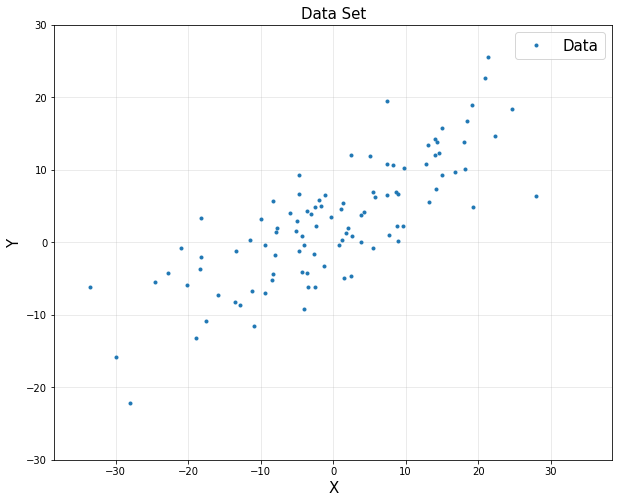

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 100
w1 = 0.5
w0 = 2
x = np.random.normal(0, 15, N).reshape(-1,1)
y = w1*x + w0 + 5*np.random.normal(0, 1, N).reshape(-1,1)

plt.figure(figsize = (10, 8))
plt.title('Data Set', fontsize = 15)
plt.plot(x, y, '.', label = 'Data')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 15)
plt.axis('equal')
plt.axis([-40, 40, -30, 30])
plt.grid(alpha = 0.3)
plt.show()

In [3]:
def KNNReg(n, train, label, test):
    res = np.zeros(test.shape[0])
    for i in range(test.shape[0]):
        distance = np.abs(train[:, 0] - test[i, 0])
        index = np.argsort(distance)
        res[i] = np.mean(label[index[:n]])
    return res

In [4]:
xp = np.linspace(-30, 30, 100).reshape(-1, 1)
yp = KNNReg(1, x, np.ravel(y), xp)

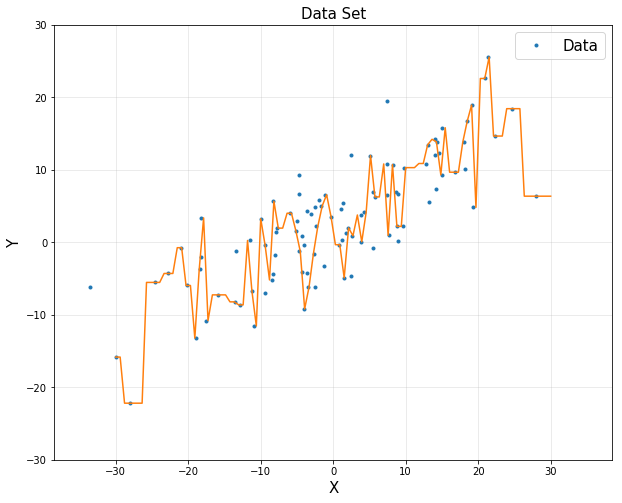

In [5]:
plt.figure(figsize=(10, 8))
plt.title('Data Set', fontsize=15)
plt.plot(x, y, '.', label='Data')
plt.plot(xp, yp)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.legend(fontsize=15)
plt.axis('equal')
plt.axis([-40, 40, -30, 30])
plt.grid(alpha=0.3)
plt.show()

### 3) KNN Classification

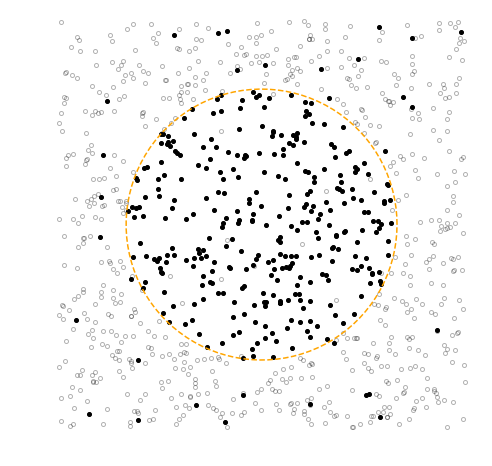

In [6]:
m = 1000
X = -1.5 + 3*np.random.uniform(size = (m,2))

y = np.zeros([m,1])
for i in range(m):
    if np.linalg.norm(X[i,:], 2) <= 1:
        if np.random.uniform() < 0.05:
            y[i] = 0
        else:
            y[i] = 1    
    else:
        if np.random.uniform() < 0.05:
            y[i] = 1
        else:
            y[i] = 0

C1 = np.where(y == 1)[0]
C0 = np.where(y == 0)[0]

theta = np.linspace(0, 2*np.pi, 100)

plt.figure(figsize = (8,8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor = 'k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()

In [7]:
def KNNclf(n, train, label, test):
    label = label.astype(np.int64)
    res = np.zeros(test.shape[0])
    for i in range(test.shape[0]):
        dist = np.linalg.norm(train - test[i], 2, axis=1)
        index = np.argsort(dist)
        res[i] = np.argmax(np.bincount(label[index[:n]]))
    return res

In [8]:
res = 0.01
[X1gr, X2gr] = np.meshgrid(np.arange(-1.5, 1.5, res),
                           np.arange(-1.5, 1.5, res))

Xp = np.hstack([X1gr.reshape(-1, 1), X2gr.reshape(-1, 1)])
Xp = np.asmatrix(Xp)

inC1 = KNNclf(1, X, np.ravel(y), Xp)

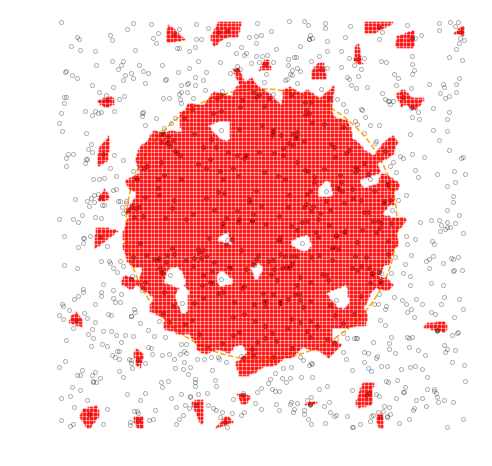

In [10]:
inC1 = inC1.reshape(-1, 1)
inCircle = np.where(inC1 == 1)[0]

plt.figure(figsize=(8, 8))
plt.plot(X[C1, 0],
         X[C1, 1],
         'o',
         label='C1',
         markerfacecolor="k",
         alpha=0.5,
         markeredgecolor='k',
         markersize=4)
plt.plot(X[C0, 0],
         X[C0, 1],
         'o',
         label='C0',
         markerfacecolor="None",
         alpha=0.3,
         markeredgecolor='k',
         markersize=4)
plt.plot(np.cos(theta), np.sin(theta), '--', color='orange')
plt.plot(Xp[inCircle][:, 0],
         Xp[inCircle][:, 1],
         's',
         alpha=0.5,
         color='r',
         markersize=1)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()
# here is your code for plotting